# Multiple Linear Regression
https://scipy-lectures.org/packages/statistics/auto_examples/plot_regression_3d.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

# For 3d plots. This import is necessary to have 3D plotting below
from mpl_toolkits.mplot3d import Axes3D

# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

In [3]:
x = np.linspace(-5, 5, 21)
# We generate a 2D grid
X, Y = np.meshgrid(x, x)
# To get reproducable values, provide a seed value
np.random.seed(1)
print(X, Y)
# Z is the elevation of this 2D grid
Z = -5 + 3*X - 0.5*Y + 8 * np.random.normal(size=X.shape)
print(Z)

[[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
   2.   2.5  3.   3.5  4.   4.5  5. ]
 [-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
   2.   2.5  3.   3.5  4.   4.5  5. ]
 [-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
   2.   2.5  3.   3.5  4.   4.5  5. ]
 [-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
   2.   2.5  3.   3.5  4.   4.5  5. ]
 [-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
   2.   2.5  3.   3.5  4.   4.5  5. ]
 [-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
   2.   2.5  3.   3.5  4.   4.5  5. ]
 [-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
   2.   2.5  3.   3.5  4.   4.5  5. ]
 [-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
   2.   2.5  3.   3.5  4.   4.5  5. ]
 [-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
   2.   2.5  3.   3.5  4.   4.5  5. ]
 [-5.  -4.

C:\Users\du\AppData\Local\Temp\ipykernel_11400\2788294103.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


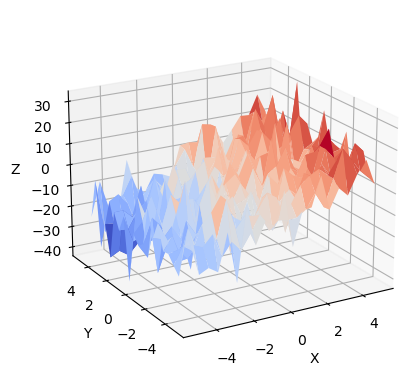

In [7]:
# Plot the data
fig = plt.figure()
#plt.subplot()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm,    rstride=1, cstride=1)
ax.view_init(20, -120)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show();

In [8]:
# Convert the data into a Pandas DataFrame to use the formulas framework
# in statsmodels

# First we need to flatten the data: it's 2D layout is not relevent.
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()

data = pd.DataFrame({'x': X, 'y': Y, 'z': Z})
data.head()

,x,y,z
0,-5.0,-5.0,-4.505237
1,-4.5,-5.0,-20.894051
2,-4.0,-5.0,-18.725374
3,-3.5,-5.0,-21.583749
4,-3.0,-5.0,-4.576739


In [9]:
# Fit the model
model = ols("z ~ x + y", data).fit()

# Print the summary
print(model.summary())

print("\nRetrieving manually the parameter estimates:")
print(model._results.params)
# should be array([-4.99754526,  3.00250049, -0.50514907])

# Peform analysis of variance on fitted linear model
anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)

plt.show()

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     320.4
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           1.89e-86
Time:                        10:59:09   Log-Likelihood:                -1537.7
No. Observations:                 441   AIC:                             3081.
Df Residuals:                     438   BIC:                             3094.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5052      0.378    -11.924      0.0